## DEMO 流程

 資料準備

In [1]:
# from google.colab import files
import pandas as pd

news = pd.read_excel("海軍2025-01-20_10-51.xlsx")

In [2]:
# 顯示關鍵字成果 (data frame 格式)

info = {
    "DATE": [],
    "TIME": [],
    "PERSON": [],
    "ORG": [],
    "EVENT": [],
    "GPE": [],
    "LOC": [],
    "Original Content": []
}
result_df = pd.DataFrame(info)

處理過程

In [3]:
from transformers import pipeline
ner = pipeline("ner",model="ckiplab/bert-base-chinese-ner", grouped_entities=True)
# Load model directly
# from transformers import AutoTokenizer,AutoModelForTokenClassification #TFAutoModelForTokenClassification

# tokenizer = AutoTokenizer.from_pretrained("ckiplab/bert-base-chinese-ner")
# model = AutoModelForTokenClassification.from_pretrained("ckiplab/bert-base-chinese-ner")
# 找出該NER輸出中包含的 entity_group 種類
def unique_entity_group(entities):
  return(set(entity['entity_group'] for entity in entities))

# 找出對應的特定 entit_group
# 輸入: entities == NER之完整輸出 & entity_group == 特定 entity_group
# 輸出: 只含特定 entity_group 之資料
def certain_entity(entities, entity_group):
  return([entity for entity in entities if entity['entity_group'] == entity_group])

# 產生 關鍵字
## 輸入: person_entities (特定)
## 輸出: 對應entities之關鍵字
def key_word(entities):
  result = []

  i=0
  while i < len(entities):
    if(i < len(entities)-1):
      if(entities[i]['end'] == entities[i+1]['start']):
        result.append(entities[i]['word'] + entities[i+1]['word'])
        i = i+2
      else:
        result.append(entities[i]['word'])
        i = i+1
    if(i == len(entities)-1):
      result.append(entities[i]['word'])
      i = i+1
  for i in range(len(result)):
    result[i] = result[i].replace(" ","")

  # print(result)
  return(result)

2025-01-21 14:57:27.796697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-21 14:57:28.703043: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/home/user/miniconda3/envs/CKIP_NLP/lib/python3.8/site-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [5]:
# main.py 主要執行程式
from tqdm import tqdm

target_EG = ["DATE","TIME","PERSON","ORG","EVENT","GPE","LOC","Original Content"]

for index in tqdm(range(len(news)), desc="處理進度", unit="行"):
  temp_content = news.iloc[index,3]
  if pd.isna(temp_content):
    continue
  temp = ner( temp_content )
  temp_entity_group = [item for item in unique_entity_group(temp) if item in target_EG]
  if "PERSON" not in temp_entity_group:
    continue
  temp_entity_group.sort(key=lambda x: x != "PERSON")

  # print("# of ",index)

  for i in range(len(temp_entity_group)):
    EG = list(temp_entity_group)[i]
    temp_certain_entity = certain_entity( temp, EG )

    # print("Entity Group: ", EG )
    # print("Detail: ", key_word(temp_certain_entity))
    if EG == 'PERSON':
      result_df.loc[len(result_df),EG] = ", ".join(key_word(temp_certain_entity))
    else:
      result_df.loc[len(result_df)-1,EG] = ", ".join(key_word(temp_certain_entity))
  result_df.loc[len(result_df)-1, 'Original Content'] = temp_content

處理進度: 100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.16行/s]


In [7]:
result_df.to_excel('[DEMO] Output.xlsx', index=False)  # index=False 取消輸出索引

以下為研究過程，如不需修改則不用看

In [ ]:
!pip install datasets evaluate transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import pipeline
ner = pipeline("ner",model="ckiplab/bert-base-chinese-ner", grouped_entities=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
a1 = ner("1月9日上午，省十四屆人大常委會第十四次會議舉行第二次全體會議。會議經表決，決定任命李九紅為陝西省副省長。")

In [ ]:
# 找出該NER輸出中包含的 entity_group 種類
def unique_entity_group(entities):
  return(set(entity['entity_group'] for entity in entities))

In [ ]:
unique_entity_group(a1)

{'EVENT', 'GPE', 'ORDINAL', 'PERSON', 'TIME'}

In [ ]:
a1

[{'entity_group': 'TIME',
  'score': 0.9999992,
  'word': '1 月 9 日 上',
  'start': 0,
  'end': 5},
 {'entity_group': 'TIME',
  'score': 0.9999993,
  'word': '午',
  'start': 5,
  'end': 6},
 {'entity_group': 'EVENT',
  'score': 0.9999872,
  'word': '省 十 四 屆 人 大 常 委 會 第 十 四 次 會',
  'start': 7,
  'end': 21},
 {'entity_group': 'EVENT',
  'score': 0.9996866,
  'word': '議',
  'start': 21,
  'end': 22},
 {'entity_group': 'ORDINAL',
  'score': 0.99999654,
  'word': '第',
  'start': 24,
  'end': 25},
 {'entity_group': 'ORDINAL',
  'score': 0.999997,
  'word': '二',
  'start': 25,
  'end': 26},
 {'entity_group': 'PERSON',
  'score': 0.99999934,
  'word': '李 九',
  'start': 42,
  'end': 44},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '紅',
  'start': 44,
  'end': 45},
 {'entity_group': 'GPE',
  'score': 0.999999,
  'word': '陝 西',
  'start': 46,
  'end': 48},
 {'entity_group': 'GPE',
  'score': 0.9999994,
  'word': '省',
  'start': 48,
  'end': 49}]

In [ ]:
# 找出對應的特定 entit_group
# 輸入: entities == NER之完整輸出 & entity_group == 特定 entity_group
# 輸出: 只含特定 entity_group 之資料
def certain_entity(entities, entity_group):
  return([entity for entity in entities if entity['entity_group'] == entity_group])

In [ ]:
certain_entity(a1,"PERSON")

[{'entity_group': 'PERSON',
  'score': 0.99999934,
  'word': '李 九',
  'start': 42,
  'end': 44},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '紅',
  'start': 44,
  'end': 45}]

In [ ]:
person_entities = [entity for entity in a1 if entity['entity_group'] == 'PERSON']

In [ ]:
time_entities = [entity for entity in a1 if entity['entity_group'] == 'TIME']

In [ ]:
event_entities = [entity for entity in a1 if entity['entity_group'] == 'EVENT']

In [ ]:
gpe_entities = [entity for entity in a1 if entity['entity_group'] == 'GPE']

In [ ]:
person_entities

[{'entity_group': 'PERSON',
  'score': 0.99999934,
  'word': '李 九',
  'start': 42,
  'end': 44},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '紅',
  'start': 44,
  'end': 45}]

In [ ]:
len(person_entities)

2

In [ ]:
s = []
for i in range(len(person_entities)):
  if(i<len(person_entities)-1):
    if(person_entities[i]['end'] == person_entities[i+1]['start']):
      s.append(person_entities[i]['word'] + person_entities[i+1]['word'])
      i=i+1
  else:
    s.append(person_entities[i]['word'])

In [ ]:
for i in range(len(s)):
  s[i] = s[i].replace(" ","")

In [ ]:
s

['李九紅', '紅']

## 製作處理出關鍵字的 workflow

### 1. 分離出特定 entity group 資料
### 2. 依據不同 entity group 產出關鍵字  
### .
### 使用場景: data frame 直接顯示關鍵字與原始內容

In [ ]:
# 產生 關鍵字
## 輸入: person_entities (特定)
## 輸出: 對應entities之關鍵字
def key_word(entities):
  result = []

  i=0
  while i < len(entities):
    if(i < len(entities)-1):
      if(entities[i]['end'] == entities[i+1]['start']):
        result.append(entities[i]['word'] + entities[i+1]['word'])
        i = i+2
    else:
      result.append(entities[i]['word'])
      i = i+1

  for i in range(len(result)):
    result[i] = result[i].replace(" ","")

  # print(result)
  return(result)

In [ ]:
key_word(person_entities)

['李九紅']

In [ ]:
key_word(time_entities)

['1月9日上午']

In [ ]:
key_word(event_entities)

['省十四屆人大常委會第十四次會議']

In [ ]:
key_word(gpe_entities)

['陝西省']

In [ ]:
import pandas as pd
result_df = {
    "DATE": [],
    "TIME": [],
    "PERSON": [],
    "ORG": [],
    "EVENT": [],
    "GPE": [],
    "LOC": [],
    "Original Content": []
}
result_df = pd.DataFrame(result_df)

In [ ]:
result_df.at[len(result_df),'DATE'] = '.1.7'

<ipython-input-26-7cbd54e94620>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '.1.7' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df.at[len(result_df),'DATE'] = '.1.7'


### 上傳 Excel 檔案至 Colab

In [ ]:
!pip install openpyxl

,DATE,TIME,PERSON,ORG,EVENT,GPE,LOC,Original Content
0,.1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving News.xlsx to News (1).xlsx


In [ ]:
pp = pd.read_excel("News.xlsx")
print(pp.head())

                   時間    來源   作者                  標題  \
0 2025-01-12 16:54:20   NaN  NaN  國務院任免國家工作人員（1月10日）   
1 2025-01-10 13:57:17  浙江新聞   王雪      王成同志任中共浙江省委副書記   
2 2025-01-12 16:32:12   NaN  NaN       國家主席習近平任免駐外大使   
3 2025-01-09 12:55:12  群眾新聞  王佳寧          李九紅任陝西省副省長   
4 2025-01-12 16:56:38   NaN  NaN   國務院任免國家工作人員（1月7日）   

                                                  內文  
0    任命單忠德為國家航天局局長、國家原子能機構主任、國家國防科技工業局局長；任命謝清華為國家...  
1                          日前，中共中央批准：王成同志任中共浙江省委副書記。  
2  一、免去盧沙野的中華人民共和國駐法蘭西共和國特命全權大使兼駐摩納哥公國特命全權大使職務；任命...  
3  1月9日上午，省十四屆人大常委會第十四次會議舉行第二次全體會議。會議經表決，決定任命李九紅為...  
4   關志鷗兼任國家自然資源總督察；任命束為為國家市場監督管理總局副局長。\n\n 免去鄧勵的外...  


In [ ]:
pp.iloc[1,1]

'浙江新聞'

In [ ]:
# 抓 xlsx 檔中的標題
pp.columns.tolist()

['時間', '來源', '作者', '標題', '內文']

In [ ]:
pp.columns.tolist()[4]

'內文'

### TOY example

#### unique_entity_group, certain_entity, key_word

In [ ]:
# 讀取 xlsx檔內文
import pandas as pd
news = pd.read_excel("News.xlsx")
print(news)

                     時間    來源   作者                  標題  \
0   2025-01-12 16:54:20   NaN  NaN  國務院任免國家工作人員（1月10日）   
1   2025-01-10 13:57:17  浙江新聞   王雪      王成同志任中共浙江省委副書記   
2   2025-01-12 16:32:12   NaN  NaN       國家主席習近平任免駐外大使   
3   2025-01-09 12:55:12  群眾新聞  王佳寧          李九紅任陝西省副省長   
4   2025-01-12 16:56:38   NaN  NaN   國務院任免國家工作人員（1月7日）   
..                  ...   ...  ...                 ...   
230 2024-01-20 12:28:38   NaN  NaN    章軻同志任國家醫療保障局黨組書記   
231 2024-01-18 15:08:33   NaN  NaN          孫志洋當選廣州市市長   
232 2024-01-17 18:08:31   NaN  NaN       國家主席習近平任免駐外大使   
233 2024-01-17 17:21:50   NaN  NaN     金衍任中國石油大學（北京）校長   
234 2024-01-16 16:54:55   NaN  NaN         國務院任免國家工作人員   

                                                    內文  
0      任命單忠德為國家航天局局長、國家原子能機構主任、國家國防科技工業局局長；任命謝清華為國家...  
1                            日前，中共中央批准：王成同志任中共浙江省委副書記。  
2    一、免去盧沙野的中華人民共和國駐法蘭西共和國特命全權大使兼駐摩納哥公國特命全權大使職務；任命...  
3    1月9日上午，省十四屆人大常委會第十四次會議舉行第二次全體會議。會議經表決，決定任命李九紅為...  
4     關志鷗兼任國家自然資源總

In [ ]:
# 抓 xlsx 檔中的標題
print('所有 column name: ',news.columns.tolist())
news.iloc[0,4]

所有 column name:  ['時間', '來源', '作者', '標題', '內文']


'\u2003\u2003任命單忠德為國家航天局局長、國家原子能機構主任、國家國防科技工業局局長；任命謝清華為國家信訪局副局長；任命張志成為國家智慧財產權局副局長；任命余英（女）為國家資料局副局長；任命楊勝為國家藥品監督管理局副局長；任命李永林為中國地震局副局長；任命郭海燕（女）為常駐聯合國環境規劃署代表、常駐聯合國人類住區規劃署代表。'

In [ ]:
news.iloc[0:1,0:3]

,時間,來源,作者
0,2025-01-12 16:54:20,NaN,NaN


In [ ]:
# 顯示關鍵字成果 (data frame 格式)
import pandas as pd

info = {
    "DATE": [],
    "TIME": [],
    "PERSON": [],
    "ORG": [],
    "EVENT": [],
    "GPE": [],
    "LOC": [],
    "Original Content": []
}

In [ ]:
result_df = pd.DataFrame(info)
result_df

,DATE,TIME,PERSON,ORG,EVENT,GPE,LOC,Original Content


In [ ]:
# # 新增一行 in dataframe
# dd.at[len(dd), "N"] = "Charlie"
# dd.at[len(dd) - 1, "Agge"] = 35
# # dd.at[len(dd) - 1, "City"] = "Los Angeles"

# print(dd)


         N Agge
0    Alice  0.0
1       hi  NaN
2       hi  NaN
3      NaN   hi
4  Charlie   35


In [ ]:
# # 如果你想在 Jupyter 或 Colab 中顯示得更直觀
# from IPython.display import display
# display(df)

  我的資料_entity_group  我的資料_score                    我的資料_word  我的資料_start  \
0              TIME    0.999999                    1 月 9 日 上           0   
1              TIME    0.999999                            午           5   
2             EVENT    0.999987  省 十 四 屆 人 大 常 委 會 第 十 四 次 會           7   
3             EVENT    0.999687                            議          21   
4           ORDINAL    0.999997                            第          24   
5           ORDINAL    0.999997                            二          25   
6            PERSON    0.999999                          李 九          42   
7            PERSON    1.000000                            紅          44   
8               GPE    0.999999                          陝 西          46   
9               GPE    0.999999                            省          48   

   我的資料_end  
0         5  
1         6  
2        21  
3        22  
4        25  
5        26  
6        44  
7        45  
8        48  
9        49  


,我的資料_entity_group,我的資料_score,我的資料_word,我的資料_start,我的資料_end
0,TIME,0.999999,1 月 9 日 上,0,5
1,TIME,0.999999,午,5,6
2,EVENT,0.999987,省 十 四 屆 人 大 常 委 會 第 十 四 次 會,7,21
3,EVENT,0.999687,議,21,22
4,ORDINAL,0.999997,第,24,25
5,ORDINAL,0.999997,二,25,26
6,PERSON,0.999999,李 九,42,44
7,PERSON,1.000000,紅,44,45
8,GPE,0.999999,陝 西,46,48
9,GPE,0.999999,省,48,49


## 使用NER model

### unique_entity_group, certain_entity, key_word

In [ ]:
## 可能不用
# !pip install datasets evaluate transformers

In [ ]:
from transformers import pipeline
ner = pipeline("ner",model="ckiplab/bert-base-chinese-ner", grouped_entities=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
print(news.iloc[1,:],'\n\nrows: ',len(news),', cols:',len(news.iloc[1,:]))

時間          2025-01-10 13:57:17
來源                         浙江新聞
作者                           王雪
標題               王成同志任中共浙江省委副書記
內文    日前，中共中央批准：王成同志任中共浙江省委副書記。
Name: 1, dtype: object 

rows:  235 , cols: 5


In [ ]:
# 找出該NER輸出中包含的 entity_group 種類
def unique_entity_group(entities):
  return(set(entity['entity_group'] for entity in entities))

In [ ]:
# 找出對應的特定 entit_group
# 輸入: entities == NER之完整輸出 & entity_group == 特定 entity_group
# 輸出: 只含特定 entity_group 之資料
def certain_entity(entities, entity_group):
  return([entity for entity in entities if entity['entity_group'] == entity_group])

In [ ]:
# 產生 關鍵字
## 輸入: person_entities (特定)
## 輸出: 對應entities之關鍵字
def key_word(entities):
  result = []

  i=0
  while i < len(entities):
    if(i < len(entities)-1):
      if(entities[i]['end'] == entities[i+1]['start']):
        result.append(entities[i]['word'] + entities[i+1]['word'])
        i = i+2
      else:
        result.append(entities[i]['word'])
        i = i+1
    if(i == len(entities)-1):
      result.append(entities[i]['word'])
      i = i+1
  for i in range(len(result)):
    result[i] = result[i].replace(" ","")

  # print(result)
  return(result)

In [ ]:
temp = ner(news.iloc[0,4])
# temp

[{'entity_group': 'PERSON',
  'score': 0.9999996,
  'word': '單 忠',
  'start': 4,
  'end': 6},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '德',
  'start': 6,
  'end': 7},
 {'entity_group': 'ORG',
  'score': 0.9999989,
  'word': '國 家 航 天',
  'start': 8,
  'end': 12},
 {'entity_group': 'ORG',
  'score': 0.99999774,
  'word': '局',
  'start': 12,
  'end': 13},
 {'entity_group': 'ORG',
  'score': 0.99999905,
  'word': '國 家 原 子 能 機',
  'start': 16,
  'end': 22},
 {'entity_group': 'ORG',
  'score': 0.99999833,
  'word': '構',
  'start': 22,
  'end': 23},
 {'entity_group': 'ORG',
  'score': 0.99999905,
  'word': '國 家 國 防 科 技 工 業',
  'start': 26,
  'end': 34},
 {'entity_group': 'ORG',
  'score': 0.9999976,
  'word': '局',
  'start': 34,
  'end': 35},
 {'entity_group': 'PERSON',
  'score': 0.99999946,
  'word': '謝 清',
  'start': 40,
  'end': 42},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '華',
  'start': 42,
  'end': 43},
 {'entity_group': 'ORG',
  'score': 0.999998

In [ ]:
temp_entity_group = unique_entity_group(temp)
temp_entity_group

{'ORG', 'PERSON'}

In [ ]:
list(temp_entity_group)[0]

'ORG'

In [ ]:
# len(list(temp_entity_group))

2

In [ ]:
temp_certain_entity = certain_entity( temp, list(temp_entity_group)[0])
temp_certain_entity

[{'entity_group': 'ORG',
  'score': 0.9999989,
  'word': '國 家 航 天',
  'start': 8,
  'end': 12},
 {'entity_group': 'ORG',
  'score': 0.99999774,
  'word': '局',
  'start': 12,
  'end': 13},
 {'entity_group': 'ORG',
  'score': 0.99999905,
  'word': '國 家 原 子 能 機',
  'start': 16,
  'end': 22},
 {'entity_group': 'ORG',
  'score': 0.99999833,
  'word': '構',
  'start': 22,
  'end': 23},
 {'entity_group': 'ORG',
  'score': 0.99999905,
  'word': '國 家 國 防 科 技 工 業',
  'start': 26,
  'end': 34},
 {'entity_group': 'ORG',
  'score': 0.9999976,
  'word': '局',
  'start': 34,
  'end': 35},
 {'entity_group': 'ORG',
  'score': 0.9999987,
  'word': '國 家 信 訪',
  'start': 44,
  'end': 48},
 {'entity_group': 'ORG',
  'score': 0.99999845,
  'word': '局',
  'start': 48,
  'end': 49},
 {'entity_group': 'ORG',
  'score': 0.9999986,
  'word': '國 家 智 慧 財 產 權',
  'start': 59,
  'end': 66},
 {'entity_group': 'ORG',
  'score': 0.9999958,
  'word': '局',
  'start': 66,
  'end': 67},
 {'entity_group': 'ORG',
  'score': 0.

In [ ]:
temp_certain_key_word = key_word( temp_certain_entity )
temp_certain_key_word

['國家航天局',
 '國家原子能機構',
 '國家國防科技工業局',
 '國家信訪局',
 '國家智慧財產權局',
 '國家資料局',
 '國家藥品監督管理局',
 '中國地震局',
 '聯合國環境規劃署',
 '聯合國人類住區規劃署']

In [ ]:
for i in range(len(temp_entity_group)):
  print("Entity Group: ",list(temp_entity_group)[i] )
  print("/nDetail: ", key_word( certain_entity( temp, list(temp_entity_group)[i]) ))

Entity Group:  ORG
/nDetail:  ['國家航天局', '國家原子能機構', '國家國防科技工業局', '國家信訪局', '國家智慧財產權局', '國家資料局', '國家藥品監督管理局', '中國地震局', '聯合國環境規劃署', '聯合國人類住區規劃署']
Entity Group:  PERSON
/nDetail:  ['單忠德', '謝清華', '張志成', '余英', '楊勝', '李永林', '郭海燕']


In [ ]:
result_df.at[0,"DATE"]=key_word( certain_entity( temp, list(temp_entity_group)[0]) )

In [ ]:
result_df

,DATE,TIME,PERSON,ORG,EVENT,GPE,LOC,Original Content
0,"[國家航天局, 國家原子能機構, 國家國防科技工業局, 國家信訪局, 國家智慧財產權局, 國...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result_df.to_excel('output.xlsx', index=False)  # index=False 取消輸出索引

In [ ]:
target_EG = ["DATE","TIME","PERSON","ORG","EVENT","GPE","LOC","Original Content"]

for index in range( 3 ):
  temp = ner( news.iloc[index,4] )
  temp_entity_group = [item for item in unique_entity_group(temp) if item in target_EG]
  if "PERSON" not in temp_entity_group:
    continue
  temp_entity_group.sort(key=lambda x: x != "PERSON")

  print("# of ",index)

  for i in range(len(temp_entity_group)):
    temp_certain_entity = certain_entity( temp, list(temp_entity_group)[i])

    print("Entity Group: ",list(temp_entity_group)[i] )
    print("Detail: ", key_word(temp_certain_entity))


# of  0
Entity Group:  ORG
Detail:  ['國家航天局', '國家原子能機構', '國家國防科技工業局', '國家信訪局', '國家智慧財產權局', '國家資料局', '國家藥品監督管理局', '中國地震局', '聯合國環境規劃署', '聯合國人類住區規劃署'] 

Entity Group:  PERSON
Detail:  ['單忠德', '謝清華', '張志成', '余英', '楊勝', '李永林', '郭海燕'] 

# of  1
Entity Group:  PERSON
Detail:  ['王成'] 

Entity Group:  ORG
Detail:  ['中共', '中共浙江省委'] 

Entity Group:  DATE
Detail:  ['日前'] 

# of  2
Entity Group:  GPE
Detail:  ['盧沙野', '中華人民共和國', '法蘭西共和國', '摩納哥公', '中華人民共和國', '法蘭西共和國', '摩納哥', '公國', '中華人民共和國', '以色列國', '中華人民共和國', '以色列國', '中華人民共和國', '貝寧共和國', '中華人民共和國', '貝寧共和國'] 

Entity Group:  PERSON
Detail:  ['鄧勵', '蔡潤', '肖軍', '彭驚濤', '張偉'] 

# of  3
Entity Group:  GPE
Detail:  ['陝西省'] 

Entity Group:  TIME
Detail:  ['1月9日上午'] 

Entity Group:  PERSON
Detail:  ['李九紅'] 

Entity Group:  EVENT
Detail:  ['省十四屆人大常委會第十四次會議'] 

# of  4
Entity Group:  ORG
Detail:  ['國家', '國家市場監督管理總局', '外交部', '國家自然資源', '察', '國家市場監督管理總局', '國家認證認可監督管理委員會', '國家林業和草原局', '國家公園管理局'] 

Entity Group:  PERSON
Detail:  ['關志鷗', '鄧勵', '王廣華', '蒲淳', '關志鷗'] 

#

In [ ]:
# main.py 主要執行程式
target_EG = ["DATE","TIME","PERSON","ORG","EVENT","GPE","LOC","Original Content"]

for index in range( 5,20 ):
  temp_content = news.iloc[index,4]
  if pd.isna(temp_content):
    continue
  temp = ner( temp_content )
  temp_entity_group = [item for item in unique_entity_group(temp) if item in target_EG]
  if "PERSON" not in temp_entity_group:
    continue
  temp_entity_group.sort(key=lambda x: x != "PERSON")

  print("# of ",index)

  for i in range(len(temp_entity_group)):
    EG = list(temp_entity_group)[i]
    temp_certain_entity = certain_entity( temp, EG )

    # print("Entity Group: ", EG )
    # print("Detail: ", key_word(temp_certain_entity))
    if EG == 'PERSON':
      result_df.loc[len(result_df),EG] = ", ".join(key_word(temp_certain_entity))
    else:
      result_df.loc[len(result_df)-1,EG] = ", ".join(key_word(temp_certain_entity))
  result_df.loc[len(result_df)-1, 'Original Content'] = news.iloc[index,4]

# of  5
Entity Group:  PERSON
Detail:  ['趙新海']
Entity Group:  ORG
Detail:  ['會', '河北省人民政府']
Entity Group:  DATE
Detail:  ['今天']
Entity Group:  EVENT
Detail:  ['河北省十四屆人大常委']
# of  6
Entity Group:  PERSON
Detail:  ['范少軍']
Entity Group:  ORG
Detail:  ['中共中央', '中共海南省委']
Entity Group:  DATE
Detail:  ['日前']
# of  7
Entity Group:  PERSON
Detail:  ['鄧雲鋒', '徐海榮']
Entity Group:  ORG
Detail:  ['中共中央', '山東省委', '山東省委']
Entity Group:  DATE
Detail:  ['日前']
# of  8
Entity Group:  PERSON
Detail:  ['吳曉軍', '羅東川']
Entity Group:  ORG
Detail:  ['青海省人民政府', '青海省人民政府']
Entity Group:  EVENT
Detail:  ['青海省第十四屆人民代表大會常務委員會第十二次會議']
Entity Group:  DATE
Detail:  ['1月4日']
# of  9
Entity Group:  PERSON
Detail:  ['王忠林', '李殿勳']
Entity Group:  ORG
Detail:  ['湖北省人民政府', '湖北省人民政府']
Entity Group:  EVENT
Detail:  ['湖北省第十四屆人民代表大會常務委員會第十四次會議']
Entity Group:  DATE
Detail:  ['1月2日']
# of  10
Entity Group:  PERSON
Detail:  ['張青松', '彭純']
Entity Group:  ORG
Detail:  ['國務院', '中央匯金公司', '中央匯金公司']
# of  11
Entity Group:  PERSON
Detail:  

In [ ]:
pd.isna(news.iloc[index,4])

True

In [ ]:
result_df

,DATE,TIME,PERSON,ORG,EVENT,GPE,LOC,Original Content
0,NaN,NaN,"單忠德, 謝清華, 張志成, 余英, 楊勝, 李永林, 郭海燕","國家航天局, 國家原子能機構, 國家國防科技工業局, 國家信訪局, 國家智慧財產權局, 國家...",NaN,NaN,NaN,任命單忠德為國家航天局局長、國家原子能機構主任、國家國防科技工業局局長；任命謝清華為國家...
1,日前,NaN,王成,"中共, 中共浙江省委",NaN,NaN,NaN,日前，中共中央批准：王成同志任中共浙江省委副書記。
2,NaN,NaN,"鄧勵, 蔡潤, 肖軍, 彭驚濤, 張偉",NaN,NaN,"盧沙野, 中華人民共和國, 法蘭西共和國, 摩納哥公, 中華人民共和國, 法蘭西共和國, 摩...",NaN,一、免去盧沙野的中華人民共和國駐法蘭西共和國特命全權大使兼駐摩納哥公國特命全權大使職務；任命...
3,NaN,1月9日上午,李九紅,NaN,省十四屆人大常委會第十四次會議,陝西省,NaN,1月9日上午，省十四屆人大常委會第十四次會議舉行第二次全體會議。會議經表決，決定任命李九紅為...
4,NaN,NaN,"關志鷗, 鄧勵, 王廣華, 蒲淳, 關志鷗","國家, 國家市場監督管理總局, 外交部, 國家自然資源, 察, 國家市場監督管理總局, 國家...",NaN,NaN,NaN,關志鷗兼任國家自然資源總督察；任命束為為國家市場監督管理總局副局長。\n\n 免去鄧勵的外...
5,今天,NaN,趙新海,"會, 河北省人民政府",河北省十四屆人大常委,NaN,NaN,今天，河北省十四屆人大常委會第十三次會議表決通過，決定任命趙新海為河北省人民政府副省長。
6,日前,NaN,范少軍,"中共中央, 中共海南省委",NaN,NaN,NaN,日前，中共中央批准：范少軍同志任中共海南省委委員、常委。
7,日前,NaN,"鄧雲鋒, 徐海榮","中共中央, 山東省委, 山東省委",NaN,NaN,NaN,日前，中共中央批准：鄧雲鋒同志任山東省委委員、常委；徐海榮同志不再擔任山東省委常委職務。
8,1月4日,NaN,"吳曉軍, 羅東川","青海省人民政府, 青海省人民政府",青海省第十四屆人民代表大會常務委員會第十二次會議,NaN,NaN,青海省第十四屆人民代表大會常務委員會第十二次會議1月4日決定，接受吳曉軍辭去青海省人民政府省...
9,1月2日,NaN,"王忠林, 李殿勳","湖北省人民政府, 湖北省人民政府",湖北省第十四屆人民代表大會常務委員會第十四次會議,NaN,NaN,湖北省第十四屆人民代表大會常務委員會第十四次會議1月2日決定，接受王忠林辭去湖北省人民政府省...


In [ ]:
list(temp_entity_group)[i]

'PERSON'

In [ ]:
result_df.columns[2] == list(temp_entity_group)[i]

True

In [ ]:
list(temp_entity_group)[i] in result_df.columns

True

In [ ]:
result_df.at[len(result_df)-1,0]

KeyError: 0

In [ ]:
result_df.loc[len(result_df),'PERSON']=111

In [ ]:
result_df

,DATE,TIME,PERSON,ORG,EVENT,GPE,LOC,Original Content
0,"[國家航天局, 國家原子能機構, 國家國防科技工業局, 國家信訪局, 國家智慧財產權局, 國...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
result_df.at[len(result_df),list(temp_entity_group)[i]]

KeyError: 3

In [ ]:
ner(" 任命單忠德為國家航天局局長、國家原子能機構主任、國家國防科技工業局局長；任命謝清華為國家信訪局副局長；任命張志成為國家智慧財產權局副局長；任命余英（女）為國家資料局副局長；任命楊勝為國家藥品監督管理局副局長；任命李永林為中國地震局副局長；任命郭海燕（女）為常駐聯合國環境規劃署代表、常駐聯合國人類住區規劃署代表。")

[{'entity_group': 'PERSON',
  'score': 0.9999996,
  'word': '單 忠',
  'start': 3,
  'end': 5},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '德',
  'start': 5,
  'end': 6},
 {'entity_group': 'ORG',
  'score': 0.9999989,
  'word': '國 家 航 天',
  'start': 7,
  'end': 11},
 {'entity_group': 'ORG',
  'score': 0.99999774,
  'word': '局',
  'start': 11,
  'end': 12},
 {'entity_group': 'ORG',
  'score': 0.99999905,
  'word': '國 家 原 子 能 機',
  'start': 15,
  'end': 21},
 {'entity_group': 'ORG',
  'score': 0.99999833,
  'word': '構',
  'start': 21,
  'end': 22},
 {'entity_group': 'ORG',
  'score': 0.99999905,
  'word': '國 家 國 防 科 技 工 業',
  'start': 25,
  'end': 33},
 {'entity_group': 'ORG',
  'score': 0.9999976,
  'word': '局',
  'start': 33,
  'end': 34},
 {'entity_group': 'PERSON',
  'score': 0.99999946,
  'word': '謝 清',
  'start': 39,
  'end': 41},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '華',
  'start': 41,
  'end': 42},
 {'entity_group': 'ORG',
  'score': 0.999998

In [ ]:
ner("關志鷗兼任國家自然資源總督察；任命束為為國家市場監督管理總局副局長。")

[{'entity_group': 'PERSON',
  'score': 0.9999994,
  'word': '關 志',
  'start': 1,
  'end': 3},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '鷗',
  'start': 3,
  'end': 4},
 {'entity_group': 'ORG',
  'score': 0.99999875,
  'word': '國 家 市 場 監 督 管 理 總',
  'start': 21,
  'end': 30},
 {'entity_group': 'ORG',
  'score': 0.999998,
  'word': '局',
  'start': 30,
  'end': 31}]

In [ ]:
ner("今天，河北省十四屆人大常委會第十三次會議表決通過，決定任命趙新海為河北省人民政府副省長。")

[{'entity_group': 'DATE',
  'score': 0.99999785,
  'word': '今',
  'start': 0,
  'end': 1},
 {'entity_group': 'DATE',
  'score': 0.99999917,
  'word': '天',
  'start': 1,
  'end': 2},
 {'entity_group': 'EVENT',
  'score': 0.90777797,
  'word': '河 北 省 十 四 屆 人 大 常 委',
  'start': 3,
  'end': 13},
 {'entity_group': 'ORG',
  'score': 0.8745444,
  'word': '會',
  'start': 13,
  'end': 14},
 {'entity_group': 'ORDINAL',
  'score': 0.7508769,
  'word': '第 十',
  'start': 14,
  'end': 16},
 {'entity_group': 'ORDINAL',
  'score': 0.99725527,
  'word': '三',
  'start': 16,
  'end': 17},
 {'entity_group': 'PERSON',
  'score': 0.99999946,
  'word': '趙 新',
  'start': 29,
  'end': 31},
 {'entity_group': 'PERSON',
  'score': 0.99999964,
  'word': '海',
  'start': 31,
  'end': 32},
 {'entity_group': 'ORG',
  'score': 0.999993,
  'word': '河 北 省 人 民 政',
  'start': 33,
  'end': 39},
 {'entity_group': 'ORG',
  'score': 0.9999975,
  'word': '府',
  'start': 39,
  'end': 40}]

In [ ]:
ner("1月9日上午，省十四屆人大常委會第十四次會議舉行第二次全體會議。會議經表決，決定任命李九紅為陝西省副省長。")

In [ ]:
ner("日前，中共中央批准：范少軍同志任中共海南省委委員、常委。")

[{'entity_group': 'DATE',
  'score': 0.9999993,
  'word': '日',
  'start': 0,
  'end': 1},
 {'entity_group': 'DATE',
  'score': 0.999998,
  'word': '前',
  'start': 1,
  'end': 2},
 {'entity_group': 'ORG',
  'score': 0.98672086,
  'word': '中 共 中',
  'start': 3,
  'end': 6},
 {'entity_group': 'ORG',
  'score': 0.8807264,
  'word': '央',
  'start': 6,
  'end': 7},
 {'entity_group': 'PERSON',
  'score': 0.9999994,
  'word': '范 少',
  'start': 10,
  'end': 12},
 {'entity_group': 'PERSON',
  'score': 0.9999995,
  'word': '軍',
  'start': 12,
  'end': 13},
 {'entity_group': 'ORG',
  'score': 0.99894637,
  'word': '中 共 海 南 省',
  'start': 16,
  'end': 21},
 {'entity_group': 'ORG',
  'score': 0.99999774,
  'word': '委',
  'start': 21,
  'end': 22}]

## use CkipNLP

In [ ]:
pip install --upgrade ckip-classic

  Preparing metadata (setup.py) ... done
  Created wheel for ckip-classic: filename=ckip_classic-1.2.3-py3-none-any.whl size=24823 sha256=12cb257cb0477ee68f7a7b40487bb230decfd4e02e7eaab1e8656e9f31c55c0d
  Stored in directory: /root/.cache/pip/wheels/b1/5b/d9/387a623c807e83d846fae0b48269661f2b27ecf6cd2a0d3b22
Successfully built ckip-classic


In [ ]:
import ckip_classic.ws
print(ckip_classic.__name__, ckip_classic.__version__)

ws = ckip_classic.ws.CkipWs(logger=False)
print(ws('中文字喔'))
for l in ws.apply_list(['中文字喔', '啊哈哈哈']): print(l)

ws.apply_file(ifile='sample/sample.txt', ofile='output/sample.tag', uwfile='output/sample.uw')
with open('output/sample.tag') as fin:
    print(fin.read())
with open('output/sample.uw') as fin:
    print(fin.read())

ImportError: Please reinstall ‘ckip-classic’ with ‘--install-option='--ws' --install-option='--ws-dir=<...>'’. Visit https://pypi.org/project/ckip-classic for more information.

In [ ]:
import ckip_classic.client
print(ckip_classic.__name__, ckip_classic.__version__)

ps = ckip_classic.client.CkipParserClient(username='USERNAME', password='PASSWORD')
print(ps('中文字(Na)　耶(T)　，(COMMACATEGORY)'))
for l in ps.apply_list(['中文字(Na)　耶(T)　，(COMMACATEGORY)', '啊(I)　哈(D)　哈(D)　哈(D)　。(PERIODCATEGORY)']): print(l)


ckip_classic 1.2.3


KeyboardInterrupt: 

In [ ]:
from transformers import pipeline
NER = pipeline("ner",model="raynardj/classical-chinese-punctuation-guwen-biaodian", grouped_entities=True)

config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/322 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [ ]:
NER("日前，中共中央批准：范少軍同志任中共海南省委委員、常委。")

[{'entity_group': '"', 'score': 0.7276828, 'word': '：', 'start': 9, 'end': 10}]

In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=d5b086ec961da9c05b6f30861661d1400a7045fe5cad9b40d271eee44d8909de
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
from transformers import pipeline
NER=pipeline(model="ckiplab/albert-base-chinese-ner", grouped_entities=True)

config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/40.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
NER("新华社北京1月15日电　1月16日出版的第2期《求是》杂志将发表中共中央总书记、国家主席、中央军委主席习近平的重要文章《进一步全面深化改革中的几个重大理论和实践问题》。")

[{'entity_group': 'ORG',
  'score': 0.9999853,
  'word': '新 华',
  'start': 0,
  'end': 2},
 {'entity_group': 'ORG',
  'score': 0.99999166,
  'word': '社',
  'start': 2,
  'end': 3},
 {'entity_group': 'GPE', 'score': 0.99998, 'word': '北', 'start': 3, 'end': 4},
 {'entity_group': 'GPE', 'score': 0.999969, 'word': '京', 'start': 4, 'end': 5},
 {'entity_group': 'DATE',
  'score': 0.99999213,
  'word': '1 月 15',
  'start': 5,
  'end': 9},
 {'entity_group': 'DATE',
  'score': 0.99998236,
  'word': '日',
  'start': 9,
  'end': 10},
 {'entity_group': 'DATE',
  'score': 0.999983,
  'word': '1 月 16',
  'start': 12,
  'end': 16},
 {'entity_group': 'DATE',
  'score': 0.9999956,
  'word': '日',
  'start': 16,
  'end': 17},
 {'entity_group': 'ORDINAL',
  'score': 0.9999988,
  'word': '第',
  'start': 20,
  'end': 21},
 {'entity_group': 'ORDINAL',
  'score': 0.99998593,
  'word': '2',
  'start': 21,
  'end': 22},
 {'entity_group': 'WORK_OF_ART',
  'score': 0.8562863,
  'word': '求',
  'start': 24,
  'end':

In [ ]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
from seqeval.metrics.sequence_labeling import get_entities

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained("shibing624/bert4ner-base-chinese")
model = AutoModelForTokenClassification.from_pretrained("shibing624/bert4ner-base-chinese")
label_list = ['I-ORG', 'B-LOC', 'O', 'B-ORG', 'I-LOC', 'I-PER', 'B-TIME', 'I-TIME', 'B-PER']

sentence = "王宏伟来自北京，是个警察，喜欢去王府井游玩儿。"


def get_entity(sentence):
    tokens = tokenizer.tokenize(sentence)
    inputs = tokenizer.encode(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = model(inputs).logits
    predictions = torch.argmax(outputs, dim=2)
    char_tags = [(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())][1:-1]
    print(sentence)
    print(char_tags)

    pred_labels = [i[1] for i in char_tags]
    entities = []
    line_entities = get_entities(pred_labels)
    for i in line_entities:
        word = sentence[i[1]: i[2] + 1]
        entity_type = i[0]
        entities.append((word, entity_type))

    print("Sentence entity:")
    print(entities)


get_entity(sentence)


ModuleNotFoundError: No module named 'seqeval'

直接抓 CkipNLP 的回傳結果 (嘗試中)

In [ ]:
!pip install selenium
!pip install webdriver-manager


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 25.0 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [61.9 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,227 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

options = webdriver.ChromeOptions()
options.add_argument("--headless")  # 無頭模式（無視窗）
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=options)

driver.get("https://www.google.com")
print(driver.title)  # 檢查是否成功打開頁面
driver.quit()


WebDriverException: Message: Service /usr/bin/chromedriver unexpectedly exited. Status code was: 1


In [ ]:
!google-chrome --version


/bin/bash: line 1: google-chrome: command not found


## 用API獲取

In [ ]:
import requests

# 定義請求 URL 和參數
# url = "https://ckip.iis.sinica.edu.tw/service/corenlp/"
url = "https://ckip.iis.sinica.edu.tw/api/corenlp/?ws=0&ner=1&wssd=2&coref=3&re=4&conparse=5"

headers = {
    "Content-Type": "application/json",
    "Origin": "https://ckip.iis.sinica.edu.tw",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36",
    "Cookie": "_gid=GA1.3.1766187728.1736960686; i18n_redirected=tw; _ga=GA1.1.31982530.1736960686; _gat_gtag_UA_103589665_2=1; _ga_PC85TFL1RZ=GS1.1.1736929375.3.1.1736929393.60.0.0"
}

data = {
    "input": "今天，河北省十四屆人大常委會第三次會議決定。",  # 根據實際需求更改
}

# 發送 POST 請求
response = requests.post(url, headers=headers, data=data)

# 處理返回數據
if response.status_code == 200:
    print("Response:", response.json())
else:
    print("Request failed:", response.status_code)


Request failed: 500


## Stanford CoreNLP

In [ ]:
import spacy
from transformers import pipeline

# 加載 spaCy 進行語法解析
nlp = spacy.load("zh_core_web_trf")
text = "張偉是ABC科技公司的首席執行官。"
doc = nlp(text)

# 提取實體
entities = [(ent.text, ent.label_) for ent in doc.ents]

# 提取關係（簡單規則）
relations = []
for token in doc:
    if token.dep_ in ("nsubj", "dobj", "prep"):
        relations.append({
            "subject": token.head.text,
            "relation": token.dep_,
            "object": token.text
        })

# 基於實體對使用 Hugging Face 模型進行關係分類
relation_model = pipeline("text-classification", model="your-relation-model")
for relation in relations:
    result = relation_model(f"{relation['subject']} 和 {relation['object']}")
    relation["relation"] = result[0]["label"]

print("關係提取結果：", relations)


OSError: [E050] Can't find model 'zh_core_web_trf'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
!pip install stanza
!pip install stanfordcorenlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 27.8 MB/s eta 0:00:00


In [ ]:
import stanza
stanza.install_corenlp()

INFO:stanza:Installing CoreNLP package into /root/stanza_corenlp


INFO:stanza:Downloaded file to /root/stanza_corenlp/corenlp.zip


In [ ]:
# 下載 CoreNLP
!wget -q -O stanford-corenlp.zip https://nlp.stanford.edu/software/stanford-corenlp-4.5.8.zip

# 解壓 CoreNLP
!unzip stanford-corenlp.zip -d stanford-corenlp


Archive:  stanford-corenlp.zip
   creating: stanford-corenlp/stanford-corenlp-4.5.8/
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/StanfordDependenciesManual.pdf  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/sample-project-pom.xml  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/protobuf-java-3.25.5-sources.jar  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/ejml-simple-0.39.jar  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/stanford-corenlp-4.5.8-models.jar  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/jakarta.json-1.1.6.jar  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/LICENSE.txt  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/RESOURCE-LICENSES  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/jollyday.jar  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/jakarta.servlet-api-4.0.4-sources.jar  
  inflating: stanford-corenlp/stanford-corenlp-4.5.8/LIBRARY-LICENSES  
  inflating: stanford-corenlp/stanford-corenlp-

In [ ]:
# for stanford-chinese-corenlp.jar
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for stanford-chinese-corenlp.jar
import shutil

# 指定 Google Drive 中檔案路徑
file_path = '/content/drive/My Drive/NLP project/stanford-corenlp-4.5.8-models-chinese.jar'

# 指定目標資料夾(表層)
target_path = '/content/stanford-corenlp/stanford-corenlp-4.5.8'

# 移動檔案
shutil.copy(file_path, target_path)
print(f"檔案已複製到 {target_path}")


檔案已複製到 /content/stanford-corenlp/stanford-corenlp-4.5.8


In [ ]:
from stanfordcorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP(r'stanford-corenlp/stanford-corenlp-4.5.8')

In [ ]:
nlp_ch = StanfordCoreNLP(r'stanford-corenlp/stanford-corenlp-4.5.8', lang='zh')

OSError: stanford-chinese-corenlp-yyyy-MM-dd-models.jar not exists. You should download and place it in the stanford-corenlp/stanford-corenlp-4.5.8/ first.

In [ ]:
nlp.pos_tag("hello moto, happy new year")

[('hello', 'UH'),
 ('moto', 'NN'),
 (',', ','),
 ('happy', 'JJ'),
 ('new', 'JJ'),
 ('year', 'NN')]

In [ ]:
print(nlp.parse("hello moto, happy new year"))

(ROOT
  (FRAG
    (INTJ (UH hello))
    (UCP
      (NP (NN moto))
      (, ,)
      (ADJP (JJ happy)
        (NP-TMP (JJ new) (NN year))))))


In [ ]:
nlp_ner = nlp.ner("Jingzhan Fashion Plaza launched the 'Green Sustainability Bagless Day' event. Members who spend any amount on the event day and bring their own reusable bags can receive twice the points as rewards. It encourages green consumption behavior with substantial discounts. The goal is to Reduce paper bag usage by 10%.")

In [ ]:
nlp_ner

[('Jingzhan', 'ORGANIZATION'),
 ('Fashion', 'ORGANIZATION'),
 ('Plaza', 'ORGANIZATION'),
 ('launched', 'O'),
 ('the', 'O'),
 ("'", 'O'),
 ('Green', 'MISC'),
 ('Sustainability', 'MISC'),
 ('Bagless', 'MISC'),
 ('Day', 'DURATION'),
 ("'", 'O'),
 ('event', 'O'),
 ('.', 'O'),
 ('Members', 'O'),
 ('who', 'O'),
 ('spend', 'O'),
 ('any', 'O'),
 ('amount', 'O'),
 ('on', 'O'),
 ('the', 'O'),
 ('event', 'O'),
 ('day', 'DURATION'),
 ('and', 'O'),
 ('bring', 'O'),
 ('their', 'O'),
 ('own', 'O'),
 ('reusable', 'O'),
 ('bags', 'O'),
 ('can', 'O'),
 ('receive', 'O'),
 ('twice', 'O'),
 ('the', 'O'),
 ('points', 'O'),
 ('as', 'O'),
 ('rewards', 'O'),
 ('.', 'O'),
 ('It', 'O'),
 ('encourages', 'O'),
 ('green', 'O'),
 ('consumption', 'O'),
 ('behavior', 'O'),
 ('with', 'O'),
 ('substantial', 'O'),
 ('discounts', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('goal', 'O'),
 ('is', 'O'),
 ('to', 'O'),
 ('Reduce', 'O'),
 ('paper', 'O'),
 ('bag', 'O'),
 ('usage', 'O'),
 ('by', 'O'),
 ('10', 'PERCENT'),
 ('%', 'PERCENT'

In [ ]:
nlp.coref("hello moto, happy new year")

[]

In [ ]:
nlp_dp = nlp.dependency_parse("hello moto, happy new year")
nlp_dp

[('ROOT', 0, 2),
 ('discourse', 2, 1),
 ('punct', 2, 3),
 ('amod', 6, 4),
 ('amod', 6, 5),
 ('appos', 2, 6)]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20381 (\N{CJK UNIFIED IDEOGRAPH-4F9D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas

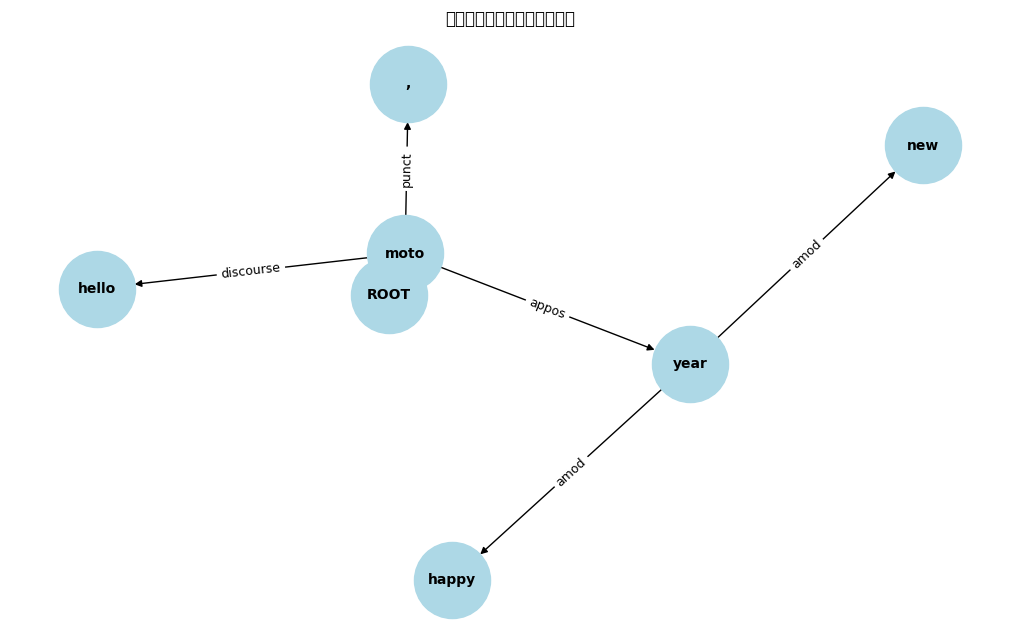

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 定義依存解析輸出與對應的字詞
nlp_dp = [
    ('ROOT', 0, 2),
    ('discourse', 2, 1),
    ('punct', 2, 3),
    ('amod', 6, 4),
    ('amod', 6, 5),
    ('appos', 2, 6)
]
tokens = ["ROOT", "hello", "moto", ",", "happy", "new", "year"]

# 構建依存圖
G = nx.DiGraph()

# 添加節點和邊
for relation, governor, dependent in nlp_dp:
    governor_word = tokens[governor]  # 獲取父節點的字詞
    dependent_word = tokens[dependent]  # 獲取子節點的字詞
    G.add_edge(governor_word, dependent_word, label=relation)  # 添加有標籤的邊

# 繪製圖形
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # 自動佈局
nx.draw(
    G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=10, font_weight="bold"
)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["label"] for u, v, d in G.edges(data=True)}, font_size=9
)

plt.title("依存解析圖（顯示原始詞語）")
plt.show()


In [ ]:
nlp_dp = nlp.dependency_parse("Jingzhan Fashion Plaza launched the 'Green Sustainability Bagless Day' event. Members who spend any amount on the event day and bring their own reusable bags can receive twice the points as rewards. It encourages green consumption behavior with substantial discounts. The goal is to Reduce paper bag usage by 10%.")
nlp_dp

[('ROOT', 0, 4),
 ('compound', 3, 1),
 ('compound', 3, 2),
 ('nsubj', 4, 3),
 ('det', 12, 5),
 ('punct', 12, 6),
 ('compound', 8, 7),
 ('compound', 10, 8),
 ('compound', 10, 9),
 ('nmod:poss', 12, 10),
 ('case', 10, 11),
 ('obj', 4, 12),
 ('punct', 4, 13),
 ('ROOT', 0, 17),
 ('nsubj', 17, 1),
 ('nsubj', 3, 2),
 ('acl:relcl', 1, 3),
 ('det', 5, 4),
 ('obj', 3, 5),
 ('case', 9, 6),
 ('det', 9, 7),
 ('compound', 9, 8),
 ('obl', 3, 9),
 ('cc', 11, 10),
 ('conj', 3, 11),
 ('nmod:poss', 15, 12),
 ('amod', 15, 13),
 ('amod', 15, 14),
 ('obj', 11, 15),
 ('aux', 17, 16),
 ('det:predet', 20, 18),
 ('det', 20, 19),
 ('obj', 17, 20),
 ('case', 22, 21),
 ('obl', 17, 22),
 ('punct', 17, 23),
 ('ROOT', 0, 2),
 ('nsubj', 2, 1),
 ('amod', 5, 3),
 ('compound', 5, 4),
 ('obj', 2, 5),
 ('case', 8, 6),
 ('amod', 8, 7),
 ('nmod', 5, 8),
 ('punct', 2, 9),
 ('ROOT', 0, 5),
 ('det', 2, 1),
 ('nsubj', 5, 2),
 ('aux', 5, 3),
 ('mark', 5, 4),
 ('compound', 7, 6),
 ('compound', 8, 7),
 ('obj', 5, 8),
 ('case', 11,

In [ ]:
import networkx as nx

# 構建 NetworkX 圖
G = nx.DiGraph()  # 有向圖

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20381 (\N{CJK UNIFIED IDEOGRAPH-4F9D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from font(s) DejaVu Sans.
  fig.canvas

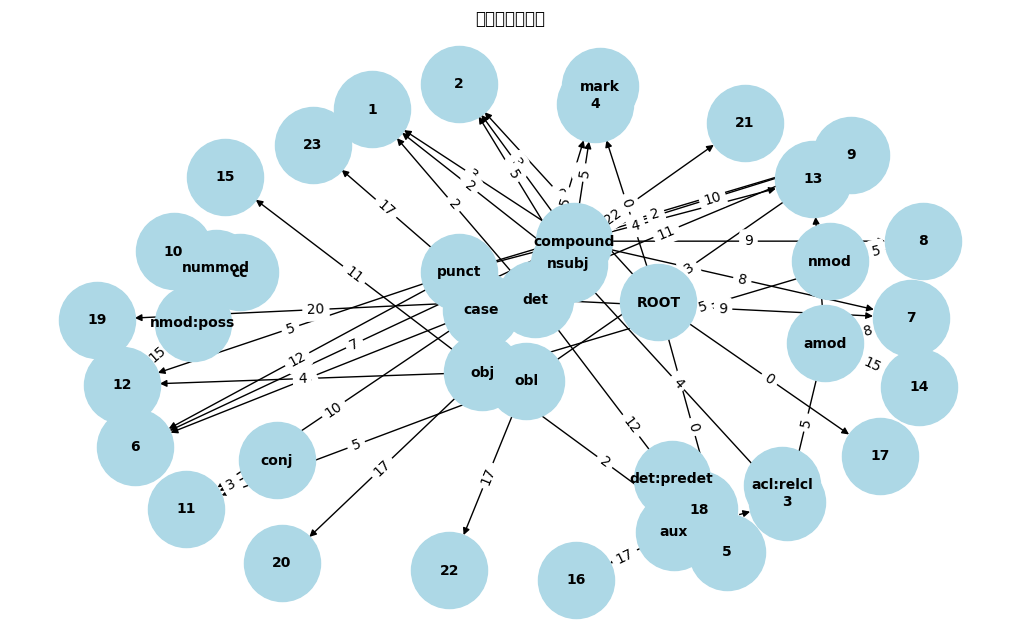

In [ ]:
import matplotlib.pyplot as plt

for governor, relation, dependent in nlp_dp:
  G.add_edge(governor, dependent, label=relation)

# 繪製圖形
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # 節點布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in G.edges(data=True)})

plt.title("依存解析關係圖")
plt.show()

In [ ]:
nlp_ner

[('hello', 'O'),
 ('moto', 'O'),
 (',', 'O'),
 ('happy', 'O'),
 ('new', 'DATE'),
 ('year', 'DATE')]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27083 (\N{CJK UNIFIED IDEOGRAPH-69CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


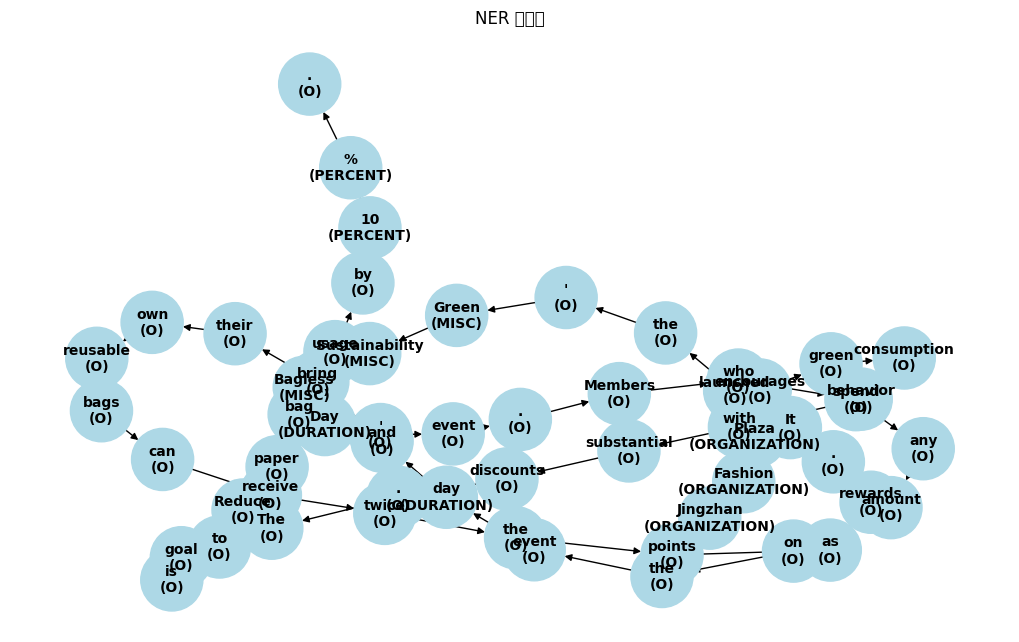

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 構建圖
G = nx.DiGraph()  # 有向圖

# 添加節點和邊
for i in range(len(nlp_ner)):
    word, entity = nlp_ner[i]
    G.add_node(i, label=word, entity=entity)  # 節點包含詞和實體類型
    if i > 0:  # 添加邊，連接相鄰節點
        G.add_edge(i - 1, i)

# 自定義節點顏色
node_colors = []
for _, data in G.nodes(data=True):
    if data['entity'] == 'DATE':
        node_colors.append('orange')  # DATE 實體用橙色表示
    else:
        node_colors.append('lightblue')  # 其他用藍色表示

# 繪製圖形
pos = nx.spring_layout(G)  # 布局
plt.figure(figsize=(10, 6))
nx.draw(
    G,
    pos,
    labels={i: f"{data['label']}\n({data['entity']})" for i, data in G.nodes(data=True)},
    with_labels=True,
    node_color=node_colors,
    node_size=2000,
    font_size=10,
    font_weight='bold'
)
plt.title("NER 圖結構")
plt.show()